In [1]:
import sys
sys.path.append("../../src")
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch.nn.functional as F

import glob
import os
from datetime import datetime
import time
import math
from tqdm import tqdm

from itertools import repeat
from torch.nn.parameter import Parameter
import collections
import matplotlib
from torch_utils import *
from ANN import MLP
from visualization import *
# matplotlib.use('Agg')

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [3]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), 
                                            torchvision.transforms.Normalize(mean=(0.4914, 0.4822, 0.4465), 
                                            std=(3*0.2023, 3*0.1994, 3*0.2010))])

cifar_dset_train = torchvision.datasets.CIFAR100('../../data', train=True, transform=transform, target_transform=None, download=True)
train_loader = torch.utils.data.DataLoader(cifar_dset_train, batch_size=20, shuffle=True, num_workers=0)

cifar_dset_test = torchvision.datasets.CIFAR100('../../data', train=False, transform=transform, target_transform=None, download=True)
test_loader = torch.utils.data.DataLoader(cifar_dset_test, batch_size=20, shuffle=False, num_workers=0)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
device = "cuda"
criterion = torch.nn.MSELoss().to(device)
criterion = torch.nn.CrossEntropyLoss()
activation = F.relu
architecture = [int(32*32*3), 2000, 1000, 100]
model = MLP(architecture, activation = activation, final_layer_activation = False).to(device)

In [5]:
evaluateClassification(model, train_loader, "cuda")

Accuracy :	 0.0093


0.0093

In [6]:
# # specify optimizer (stochastic gradient descent) and learning rate
# optimizer = torch.optim.SGD(model.parameters(),lr = 0.001, momentum = 0.0)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001/7)
trn_acc_list = []
tst_acc_list = []

n_epochs = 20
for epoch_ in range(n_epochs):
    model.train()
    for idx, (x, y) in tqdm(enumerate(train_loader)):
        x, y = x.to(device), y.to(device)
        y_one_hot = F.one_hot(y, num_classes=model.nc)
        optimizer.zero_grad()
        y_hat = model(x)
        loss = criterion(y_hat,y)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
    trn_acc = evaluateClassification(model, train_loader, device, False)
    tst_acc = evaluateClassification(model, test_loader, device, False)
    trn_acc_list.append(trn_acc)
    tst_acc_list.append(tst_acc)
    
    print("Epoch : {}, Train Accuracy : {}, Test Accuracy : {}".format(epoch_+1, trn_acc, tst_acc))

2500it [00:13, 186.11it/s]
18it [00:00, 171.78it/s]

Epoch : 1, Train Accuracy : 0.22068, Test Accuracy : 0.1949


2500it [00:13, 186.52it/s]
18it [00:00, 173.43it/s]

Epoch : 2, Train Accuracy : 0.28364, Test Accuracy : 0.2304


2500it [00:13, 186.78it/s]
18it [00:00, 172.37it/s]

Epoch : 3, Train Accuracy : 0.334, Test Accuracy : 0.2522


2500it [00:13, 186.04it/s]
18it [00:00, 172.51it/s]

Epoch : 4, Train Accuracy : 0.39402, Test Accuracy : 0.2693


2500it [00:13, 185.98it/s]
18it [00:00, 173.54it/s]

Epoch : 5, Train Accuracy : 0.45182, Test Accuracy : 0.2791


2500it [00:13, 186.55it/s]
18it [00:00, 174.73it/s]

Epoch : 6, Train Accuracy : 0.50412, Test Accuracy : 0.2803


2500it [00:13, 186.57it/s]
18it [00:00, 172.73it/s]

Epoch : 7, Train Accuracy : 0.5813, Test Accuracy : 0.2822


2500it [00:13, 186.67it/s]
17it [00:00, 169.70it/s]

Epoch : 8, Train Accuracy : 0.63492, Test Accuracy : 0.287


2500it [00:13, 186.33it/s]
18it [00:00, 171.12it/s]

Epoch : 9, Train Accuracy : 0.70098, Test Accuracy : 0.2891


2500it [00:13, 186.46it/s]
18it [00:00, 171.57it/s]

Epoch : 10, Train Accuracy : 0.74878, Test Accuracy : 0.2901


2500it [00:14, 172.87it/s]
18it [00:00, 171.73it/s]

Epoch : 11, Train Accuracy : 0.7982, Test Accuracy : 0.2878


2500it [00:14, 172.41it/s]
14it [00:00, 138.50it/s]

Epoch : 12, Train Accuracy : 0.83542, Test Accuracy : 0.2914


2500it [00:14, 171.85it/s]
15it [00:00, 143.32it/s]

Epoch : 13, Train Accuracy : 0.87052, Test Accuracy : 0.2835


2500it [00:14, 172.16it/s]
16it [00:00, 152.42it/s]

Epoch : 14, Train Accuracy : 0.89752, Test Accuracy : 0.2856


2500it [00:14, 172.78it/s]
18it [00:00, 172.33it/s]

Epoch : 15, Train Accuracy : 0.913, Test Accuracy : 0.2789


2500it [00:14, 171.92it/s]
18it [00:00, 171.11it/s]

Epoch : 16, Train Accuracy : 0.92898, Test Accuracy : 0.2788


2500it [00:14, 172.88it/s]
17it [00:00, 169.27it/s]

Epoch : 17, Train Accuracy : 0.93712, Test Accuracy : 0.2746


2500it [00:14, 172.83it/s]
17it [00:00, 162.72it/s]

Epoch : 18, Train Accuracy : 0.94096, Test Accuracy : 0.2782


2500it [00:14, 172.57it/s]
18it [00:00, 171.10it/s]

Epoch : 19, Train Accuracy : 0.94672, Test Accuracy : 0.2723


2500it [00:14, 172.94it/s]


Epoch : 20, Train Accuracy : 0.94178, Test Accuracy : 0.2725


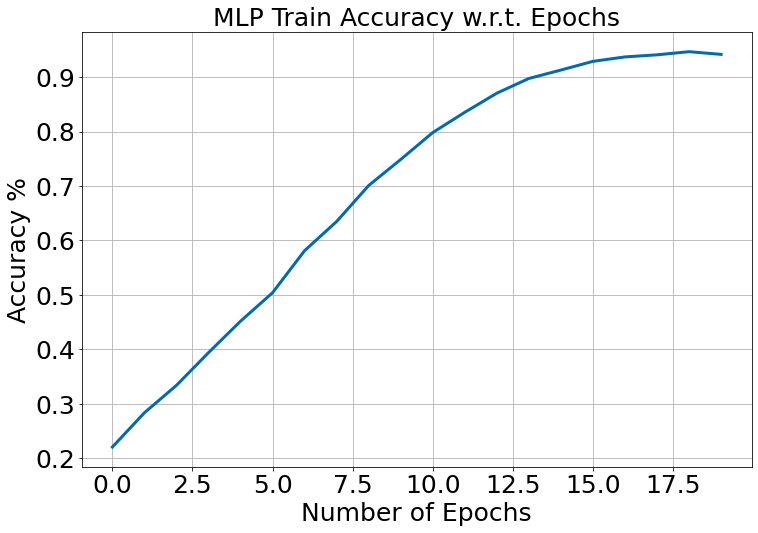

In [7]:
plot_convergence_plot(trn_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'MLP Train Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)

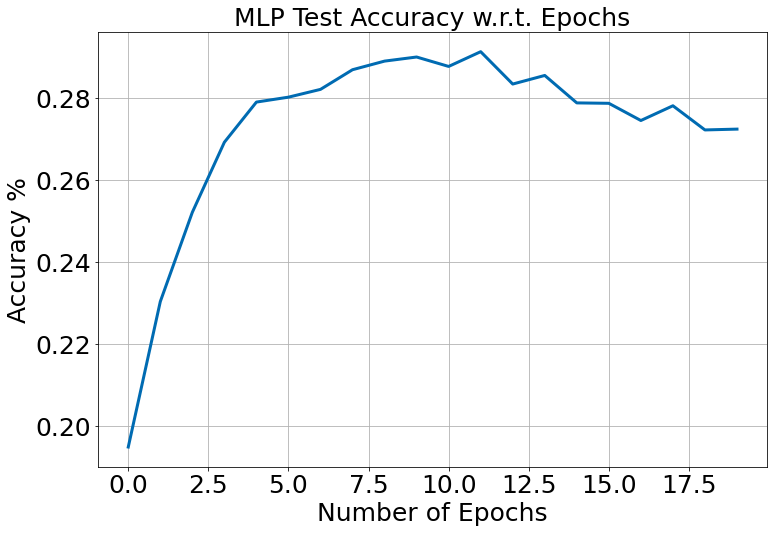

In [8]:
plot_convergence_plot(tst_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'MLP Test Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)